# Importing necessary libraries

In [1]:
# basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
import plotly.express as px
from sklearn import metrics
import dateutil
from sklearn.model_selection import train_test_split

# models and evaluation
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import plotly.graph_objects as go
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC  
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix
import seaborn as sns
from scipy.stats import reciprocal, uniform

# Importing all the datasets

In [2]:
cbyp_01_12 = pd.read_csv (r'Datasets/17_Crime_by_place_of_occurrence_2001_2012.csv')
cbyp_2013 = pd.read_csv (r'Datasets/17_Crime_by_place_of_occurrence_2013.csv')
cbyp_2014 = pd.read_csv (r'Datasets/17_Crime_by_place_of_occurrence_2014.csv')

dw_01_12 = pd.read_csv (r'Datasets/01_District_wise_crimes_committed_IPC_2001_2012.csv')
dw_2013 = pd.read_csv (r'Datasets/01_District_wise_crimes_committed_IPC_2013.csv')
dw_2014 = pd.read_csv (r'Datasets/01_District_wise_crimes_committed_IPC_2014.csv')

# Exploratory Data Analysis (EDA)

In [3]:
cbyp_2014.columns

Index(['States/UTs', 'Year', 'Residence_Dacoity_Cases reported',
       'Residence_Dacoity_Value of property stolen',
       'Residence_Robbery_Cases reported',
       'Residence_Robbery_Value of property stolen',
       'Residence_Burglary_Cases reported',
       'Residence_Burglary_Value of property stolen',
       'Residence_Theft_Cases reported',
       'Residence_Theft_Value of property stolen',
       'Highways_Dacoity_Cases reported',
       'Highways_Dacoity_Value of property stolen',
       'Highways_Robbery_Cases reported',
       'Highways_Robbery_Value of property stolen',
       'Highways_Burglary_Cases reported',
       'Highways_Burglary_Value of property stolen',
       'Highways_Theft_Cases reported',
       'Highways_Theft_Value of property stolen',
       'RiverOrSea_Dacoity_Cases reported',
       'RiverOrSea_Dacoity_Value of property stolen',
       'RiverOrSea_Robbery_Cases reported',
       'RiverOrSea_Robbery_Value of property stolen',
       'RiverOrSea_Burglar

In [4]:
cbyp_01_12.head()

,STATE/UT,YEAR,RESIDENTIAL PREMISES - Dacoity,RESIDENTIAL PREMISES - Robbery,RESIDENTIAL PREMISES - Burglary,RESIDENTIAL PREMISES - Theft,HIGHWAYS - Dacoity,HIGHWAYS - Robbery,HIGHWAYS - Burglary,HIGHWAYS - Theft,...,COMMERCIAL ESTABLISHMENTS - Burglary,COMMERCIAL ESTABLISHMENTS - Theft,OTHER PLACES - Dacoity,OTHER PLACES - Robbery,OTHER PLACES - Burglary,OTHER PLACES - Theft,TOTAL - Dacoity,TOTAL - Robbery,TOTAL - Burglary,TOTAL - Theft
0,ANDHRA PRADESH,2001,100,177,5158,4257,57,172,31,74,...,1041,2502,37,232,862,8849,214,629,7220,16751
1,ARUNACHAL PRADESH,2001,9,26,99,131,0,0,0,8,...,84,54,8,40,65,249,22,84,248,443
2,ASSAM,2001,381,191,1695,2901,46,136,7,87,...,442,967,77,261,271,1342,532,687,2423,5367
3,BIHAR,2001,818,326,2486,4741,162,826,0,257,...,231,686,210,880,505,2582,1291,2203,3233,9701
4,CHHATTISGARH,2001,54,42,3336,1417,10,38,12,72,...,370,299,15,239,420,2835,87,338,4144,4812


In [5]:
cbyp_2013.head()

,STATE/UT,YEAR,RESIDENTIAL PREMISES - Dacoity,RESIDENTIAL PREMISES - Robbery,RESIDENTIAL PREMISES - Burglary,RESIDENTIAL PREMISES - Theft,HIGHWAYS - Dacoity,HIGHWAYS - Robbery,HIGHWAYS - Burglary,HIGHWAYS - Theft,...,COMMERCIAL ESTABLISHMENTS - Burglary,COMMERCIAL ESTABLISHMENTS - Theft,OTHER PLACES - Dacoity,OTHER PLACES - Robbery,OTHER PLACES - Burglary,OTHER PLACES - Theft,TOTAL - Dacoity,TOTAL - Robbery,TOTAL - Burglary,TOTAL - Theft
0,Andhra Pradesh,2013,43,229,7264,10539,31,109,0,528,...,796,2578,45,325,1740,15670,125,709,9820,31032
1,Arunachal Pradesh,2013,6,19,85,138,3,12,0,7,...,54,168,15,28,57,200,24,75,196,514
2,Assam,2013,133,313,2652,6449,12,92,17,22,...,542,797,92,437,1072,3223,246,923,4291,10515
3,Bihar,2013,260,85,3084,9360,240,1244,9,588,...,312,2129,42,119,777,7989,579,1521,4185,21423
4,Chhattisgarh,2013,7,15,2759,1356,7,51,67,37,...,313,402,31,271,376,3200,47,351,3527,5189


In [6]:
cbyp_2014.head()

,States/UTs,Year,Residence_Dacoity_Cases reported,Residence_Dacoity_Value of property stolen,Residence_Robbery_Cases reported,Residence_Robbery_Value of property stolen,Residence_Burglary_Cases reported,Residence_Burglary_Value of property stolen,Residence_Theft_Cases reported,Residence_Theft_Value of property stolen,...,OtherPlaces_Theft_Cases reported,OtherPlaces_Theft_Value of property stolen,Total_Dacoity_Cases reported,Total_Dacoity_Value of property stolen,Total_Robbery_Cases reported,Total_Robbery_Value of property stolen,Total_Burglary_Cases reported,Total_Burglary_Value of property stolen,Total_Theft_Cases reported,Total_Theft_Value of property stolen
0,Andhra Pradesh,2014,27,7983001,124,10577950,3530,226363051,5757,199348324,...,4997,199285711,75,27152368,433,41148643,4719,321352316.0,15617,641880290
1,Arunachal Pradesh,2014,3,67500,8,86350,103,6637940,173,15422078,...,158,37247470,12,477000,61,8718930,224,12324815.0,498,78789228
2,Assam,2014,144,10693775,315,4191631,2293,26376373,4503,131897564,...,5981,130654964,267,16603231,1038,18121153,4954,49369570.0,12737,311982322
3,Bihar,2014,174,27725940,117,6558972,3693,262152615,6655,116467719,...,10874,416911296,538,151516733,1600,74012959,4674,279472385.0,22888,693664033
4,Chhattisgarh,2014,27,3076170,25,1137900,1985,85802275,1235,53896428,...,3057,125524854,58,911101420,405,26477826,3247,150182672.0,6098,266495669


In [7]:
dw_01_12.head()

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,30,1131,16,149,34,175,0,181,1518,4154
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,...,69,1543,7,118,24,154,0,270,754,4125
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,...,38,2088,14,112,83,186,0,404,1262,5818
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,...,23,795,17,126,38,57,0,233,1181,3140
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,41,1244,12,109,58,247,0,431,2313,6507


In [8]:
dw_2013.head()

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,Andhra Pradesh,ADILABAD,2013,96,72,13,61,0,61,65,...,30,2394,12,197,138,464,0,376,1390,6381
1,Andhra Pradesh,ANANTAPUR,2013,156,149,3,28,0,28,110,...,29,2537,23,337,43,161,0,573,1634,6913
2,Andhra Pradesh,CHITTOOR,2013,72,61,2,31,0,31,52,...,18,937,13,119,84,435,0,546,2239,5610
3,Andhra Pradesh,CUDDAPAH,2013,93,107,7,19,0,19,84,...,34,2310,9,318,163,207,0,464,1741,7048
4,Andhra Pradesh,CYBERABAD,2013,162,123,16,138,0,138,192,...,40,4284,43,350,338,1526,0,1104,3139,19992


In [9]:
dw_2014.head()

,States/UTs,District,Year,Murder,Attempt to commit Murder,Culpable Homicide not amounting to Murder,Attempt to commit Culpable Homicide,Rape,Custodial Rape,Custodial_Gang Rape,...,Offences promoting enmity between different groups,Promoting enmity between different groups,"Imputation, assertions prejudicial to national integration",Extortion,Disclosure of Identity of Victims,Incidence of Rash Driving,HumanTrafficking,Unnatural Offence,Other IPC crimes,Total Cognizable IPC crimes
0,Andhra Pradesh,Anantapur,2014,134,171,8,0,35,0,0,...,0,0,0,0,0,1038,0,0,3800,8376
1,Andhra Pradesh,Chittoor,2014,84,170,2,0,32,0,0,...,0,0,0,19,0,249,0,0,2567,5374
2,Andhra Pradesh,Cuddapah,2014,80,162,1,0,28,0,0,...,0,0,0,0,0,948,0,0,2604,5803
3,Andhra Pradesh,East Godavari,2014,64,84,2,0,85,0,0,...,0,0,0,32,0,39,0,0,3791,7630
4,Andhra Pradesh,Guntakal Railway,2014,14,4,0,0,0,0,0,...,0,0,0,0,0,1,0,0,37,490


In [10]:
print(dw_01_12.shape)
print(dw_2013.shape)
print(dw_2014.shape)
print(cbyp_01_12.shape)
print(cbyp_2013.shape)
print(cbyp_2014.shape)

(9017, 33)
(823, 33)
(838, 91)
(457, 34)
(38, 34)
(39, 82)


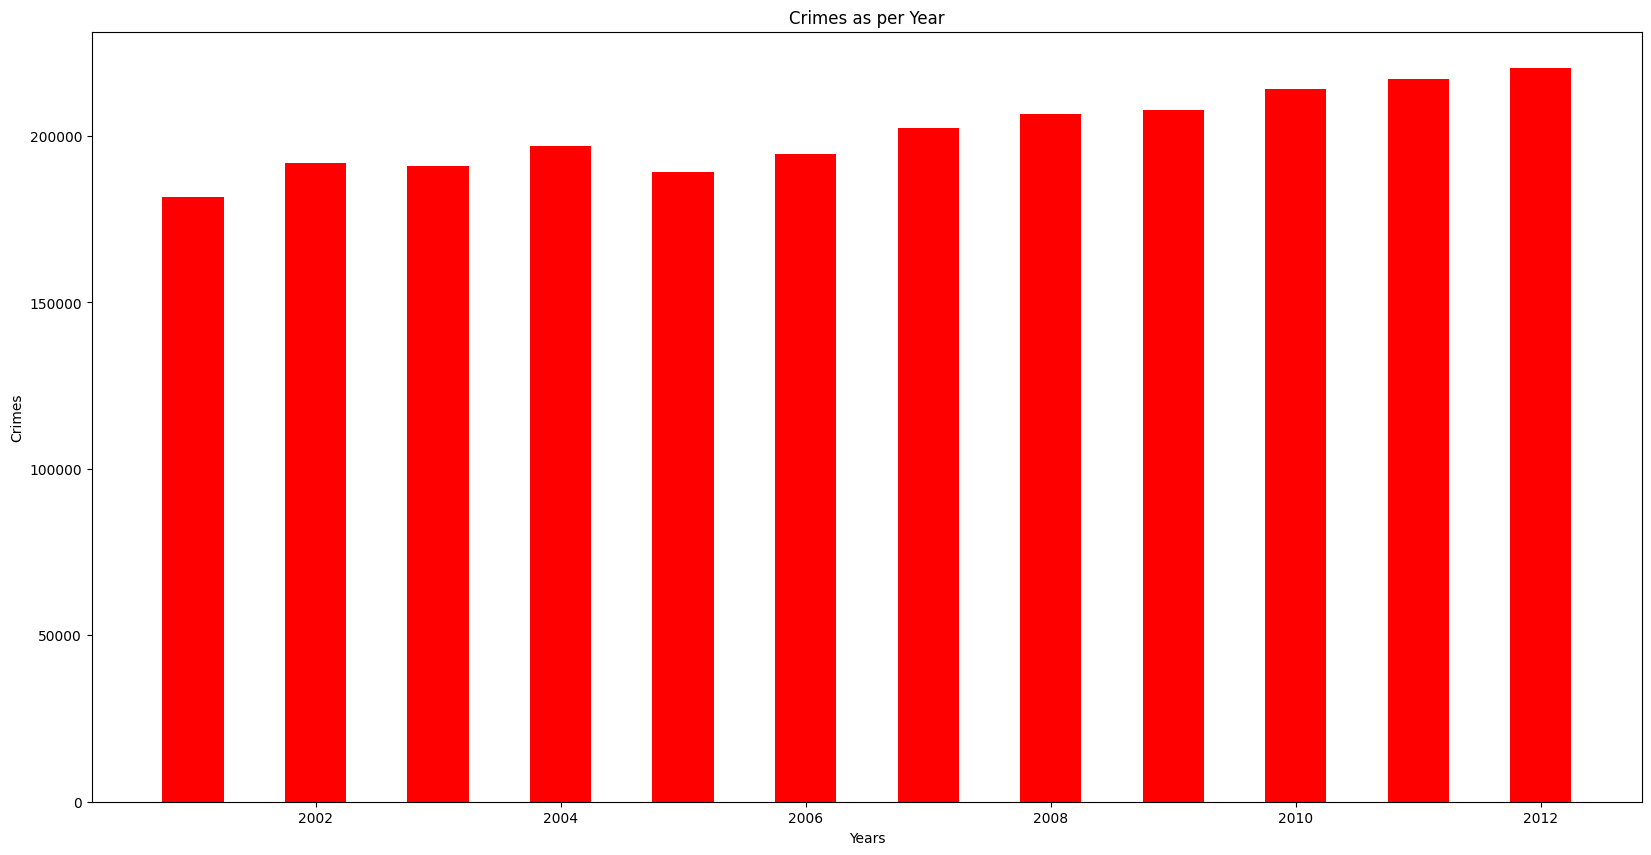

In [11]:
x = dw_01_12['YEAR']
y = dw_01_12['TOTAL IPC CRIMES']
z = dw_01_12['STATE/UT']
k = dw_01_12['KIDNAPPING & ABDUCTION']
fig = plt.figure(figsize = (20, 10))
plt.bar(x, y, color ='red', width = 0.5)
 
plt.xlabel("Years")
plt.ylabel("Crimes")
plt.title("Crimes as per Year")
plt.show()

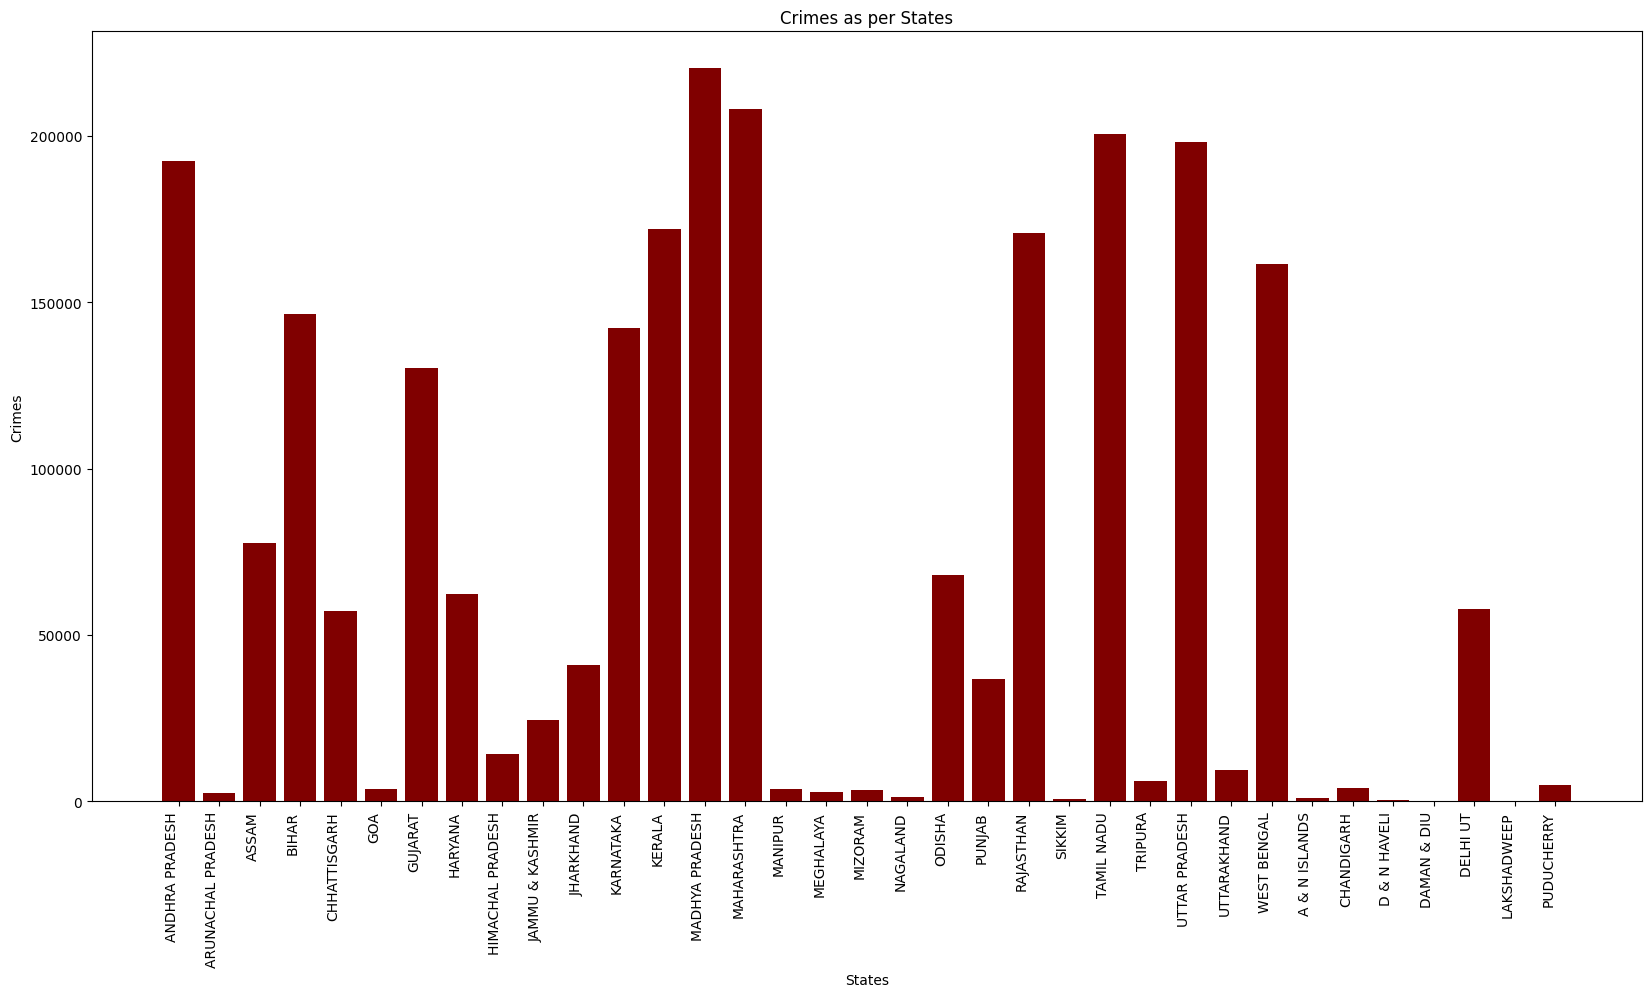

In [12]:
fig = plt.figure(figsize = (20, 10))
plt.bar(z, y, color ='maroon', width = 0.8)
 
plt.xlabel("States")
plt.ylabel("Crimes")
plt.title("Crimes as per States")

ax = plt.subplot()
plt.setp(ax.get_xticklabels(), rotation=90, ha='right')

plt.show()

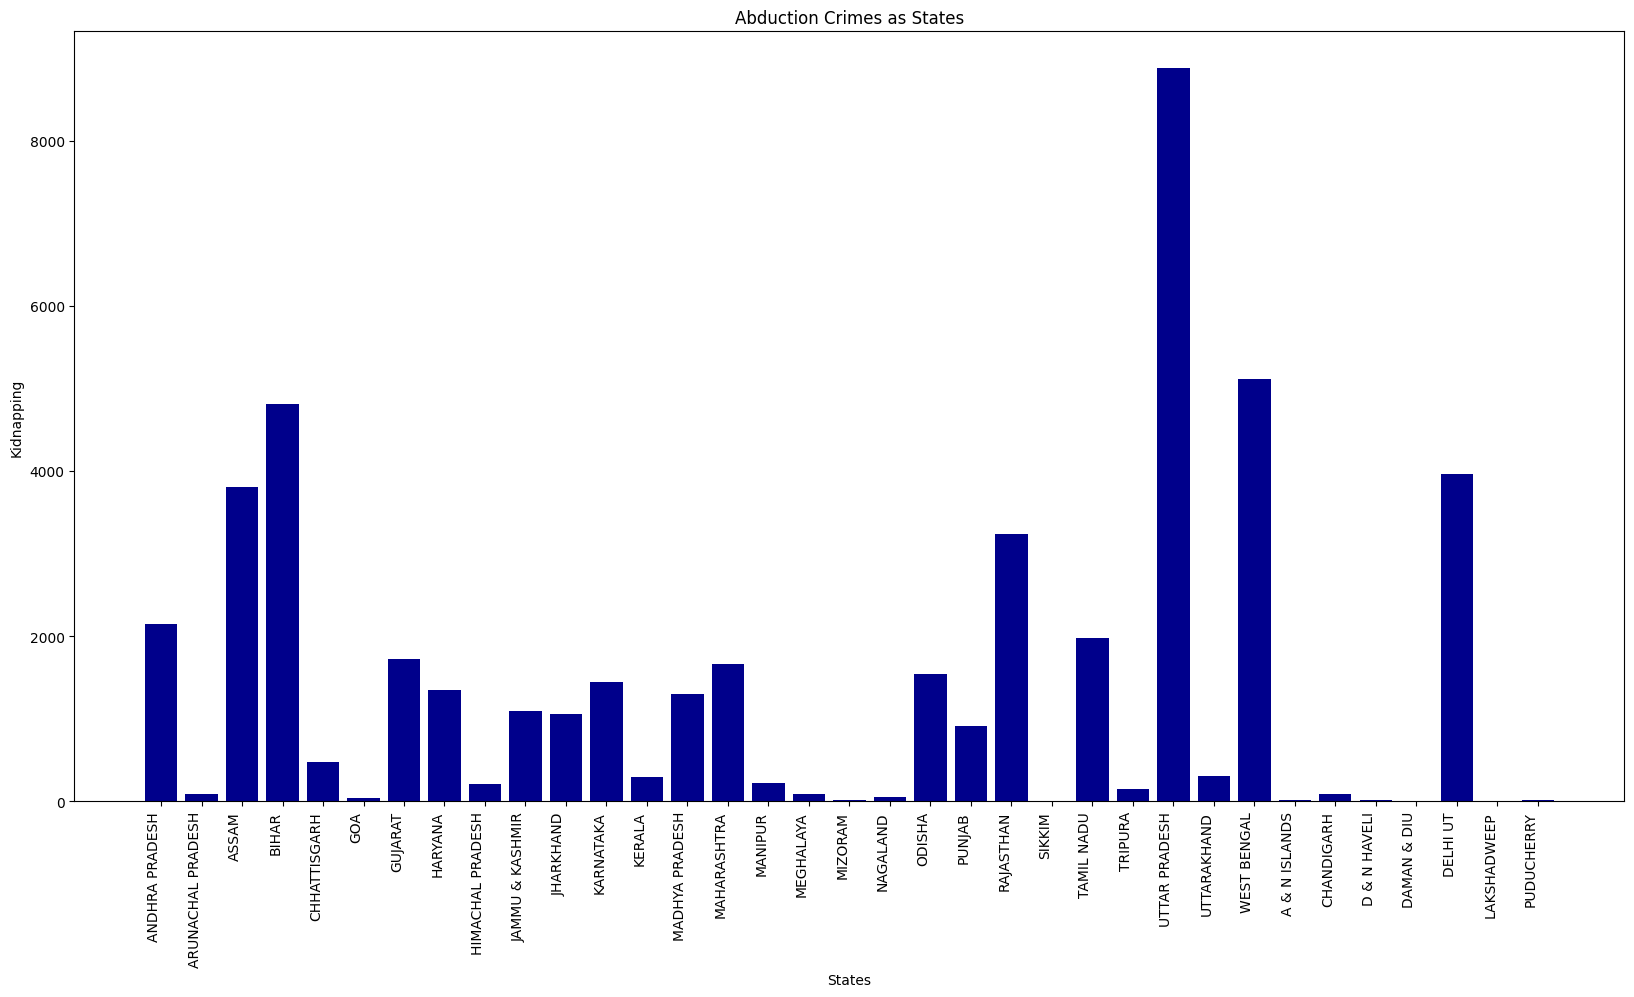

In [13]:
fig = plt.figure(figsize = (20, 10))
plt.bar(z, k, color ='darkblue', width = 0.8)
 
plt.xlabel("States")
plt.ylabel("Kidnapping")
plt.title("Abduction Crimes as States")

ax = plt.subplot()
plt.setp(ax.get_xticklabels(), rotation=90, ha='right')

plt.show()

# Data Cleaning and Preprocessing

In [14]:
# removing all the irrelevant columns
cols = [c for c in cbyp_2014.columns if c.lower()[:9] != 'residence']
cbyp_2014 = cbyp_2014[cols]
cols2 = [c for c in cbyp_01_12.columns if c.lower()[:11] != 'residential']
cbyp_01_12 = cbyp_01_12[cols2]
cols3 = [c for c in cbyp_2014.columns if c.lower()[-1] != 'n']
cbyp_2014 = cbyp_2014[cols3]
cols4 = [c for c in cbyp_2014.columns if c.lower()[:3] != 'atm']
cbyp_2014 = cbyp_2014[cols4]
cols5 = [c for c in cbyp_2014.columns if c.lower()[:9] != 'religious']
cbyp_2014 = cbyp_2014[cols5]
cols6 = [c for c in cbyp_2013.columns if c.lower()[:11] != 'residential']
cbyp_2013 = cbyp_2013[cols6]

dw_01_12 = dw_01_12.drop(["CRUELTY BY HUSBAND OR HIS RELATIVES"], axis = 1)
dw_01_12 = dw_01_12.drop(["DOWRY DEATHS"], axis = 1)
dw_01_12 = dw_01_12.drop(["DACOITY"], axis = 1)
dw_2013 = dw_2013.drop(["CRUELTY BY HUSBAND OR HIS RELATIVES"], axis = 1)
dw_2013 = dw_2013.drop(["DACOITY"], axis = 1)
dw_2013 = dw_2013.drop(["DOWRY DEATHS"], axis = 1)

In [15]:
# drop all irrelevant columns
dw_2014 = dw_2014.drop(
    ['Custodial_Gang Rape',
     'Attempt to commit Culpable Homicide',
     'Custodial_Other Rape',
     'Rape other than Custodial',
     'Rape_Gang Rape',
     'Dacoity',
     'Cruelty by Husband or his Relatives',
     'Dowry Deaths',
     'Attempt to commit Rape',
     'Kidnapping & Abduction',
     'Kidnapping & Abduction in order to Murder',
     'Kidnapping for Ransom',
     'Dacoity with Murder',
     'Other Dacoity',
     'House Trespass & House Breaking',
     'Unlawful Assembly',
     'Riots_Communal',
     'Riots_Industrial',
     'Riots_Political',
     'Riots_Caste Conflict',
     'Riots_SC/STs Vs Non-SCs/STs',
     'Riots_Other Caste Conflict',
     'Riots_Agrarian',
     'Riots_Students',
     'Riots_Sectarian',
     'Riots_Others',
     'Forgery',
     'Counterfeit Offences related to Counterfeit Coin',
     'Counterfeiting Government Stamp',
     'Counterfeit currency & Bank notes',
     'Counterfeiting currency notes/Bank notes',
     'Using forged or counterfeiting currency/Bank notes',
     'Possession of forged or counterfeiting currency/Bank notes',
     'Making or Possessing materials for forged currency/Bank notes',
     'Making or Using documents resembling currency',
     'Hurt',
     'Acid attack',
     'Attempt to Acid Attack',
     'Sexual Harassment',
     'Assault or use of criminal force to women with intent to Disrobe',
     'Voyeurism',
     'Stalking',
     'Other Assault on Women',
     'At Office premises',
     'Other places related to work',
     'In Public Transport system',
     'Places other than 231, 232 & 233',
     'Deaths due to negligent driving/act',
     'Deaths due to Other Causes',
     'Offences against State',
     'Sedition',
     'Other offences against State',
     'Offences promoting enmity between different groups',
     'Promoting enmity between different groups',
     'Imputation, assertions prejudicial to national integration',
     'Extortion',
     'Disclosure of Identity of Victims',
     'Incidence of Rash Driving',
     'HumanTrafficking',
     'Unnatural Offence'], axis=1)

dict1 = {
    'States/UTs' : 'STATE/UT',
    'Year' : 'YEAR',
    'Highways_Dacoity_Cases reported' : 'HIGHWAYS - Dacoity',
    'Highways_Robbery_Cases reported' : 'HIGHWAYS - Robbery',
    'Highways_Burglary_Cases reported' : 'HIGHWAYS - Burglary',
    'Highways_Theft_Cases reported' : 'HIGHWAYS - Theft',
    'RiverOrSea_Dacoity_Cases reported' : 'RIVER and SEA - Dacoity',
    'RiverOrSea_Robbery_Cases reported' : 'RIVER and SEA - Robbery',
    'RiverOrSea_Burglary_Cases reported' : 'RIVER and SEA - Burglary',
    'RiverOrSea_Theft_Cases reported' : 'RIVER and SEA - Theft',
    'Railways_Dacoity_Cases reported' : 'RAILWAYS - Dacoity',
    'Railways_Robbery_Cases reported' : 'RAILWAYS - Robbery',
    'Railways_Burglary_Cases reported' : 'RAILWAYS - Burglary',
    'Railways_Theft_Cases reported' : 'RAILWAYS - Theft',
    'Bank_Dacoity_Cases reported' : 'BANKS - Dacoity',
    'Bank_Robbery_Cases reported' : 'BANKS - Robbery',
    'Bank_Burglary_Cases reported' : 'BANKS - Burglary',
    'Bank_Theft_Cases reported' : 'BANKS - Theft',
    'CommEst_Dacoity_Cases reported' : 'COMMERCIAL ESTABLISHMENTS - Dacoity',
    'CommEst_Robbery_Cases reported' : 'COMMERCIAL ESTABLISHMENTS - Robbery',
    'CommEst_Burglary_Cases reported' : 'COMMERCIAL ESTABLISHMENTS - Burglary',
    'CommEst_Theft_Cases reported' : 'COMMERCIAL ESTABLISHMENTS - Theft',
    'OtherPlaces_Dacoity_Cases reported' : 'OTHER PLACES - Dacoity',
    'OtherPlaces_Robbery_Cases reported' : 'OTHER PLACES - Robbery',
    'OtherPlaces_Burglary_Cases reported' : 'OTHER PLACES - Burglary',
    'OtherPlaces_Theft_Cases reported' : 'OTHER PLACES - Theft',
    'Total_Dacoity_Cases reported' : 'TOTAL - Dacoity',
    'Total_Robbery_Cases reported' : 'TOTAL - Robbery',
    'Total_Burglary_Cases reported' : 'TOTAL - Burglary',
    'Total_Theft_Cases reported' : 'TOTAL - Theft'
}

cbyp_2014.rename(columns=dict1, inplace=True)

dict2 = {
    'States/UTs' : 'STATE/UT',
    'District' : 'DISTRICT',
    'Year' : 'YEAR',
    'Murder' : 'MURDER',
    'Attempt to commit Murder' : 'ATTEMPT TO MURDER',
    'Culpable Homicide not amounting to Murder' : 'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER',
    'Rape' : 'RAPE',
    'Custodial Rape' : 'CUSTODIAL RAPE',
    'Rape_Others' : 'OTHER RAPE',
    'Kidnapping & Abduction_Total' : 'KIDNAPPING & ABDUCTION',
    'Kidnapping & Abduction of Women to compel her for marriage' : 'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
    'Other Kidnapping' : 'KIDNAPPING AND ABDUCTION OF OTHERS',
    'Making Preparation and Assembly for committing Dacoity' : 'PREPARATION AND ASSEMBLY FOR DACOITY',
    'Robbery' : 'ROBBERY',
    'Criminal Trespass/Burglary' : 'BURGLARY',
    'Criminal Trespass or Burglary' : 'BURGLARY2',
    'Theft' : 'THEFT',
    'Auto Theft' : 'AUTO THEFT',
    'Other Thefts' : 'OTHER THEFT',
    'Riots' : 'RIOTS',
    'Criminal Breach of Trust' : 'CRIMINAL BREACH OF TRUST',
    'Cheating' : 'CHEATING',
    'Counterfeiting' : 'COUNTERFIETING',
    'Arson' : 'ARSON',
    'Grievous Hurt' : 'HURT/GREVIOUS HURT',
    'Assault on Women with intent to outrage her Modesty' : 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
    'Insult to the Modesty of Women' : 'INSULT TO MODESTY OF WOMEN',
    'Importation of Girls from Foreign Country' : 'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
    'Causing Death by Negligence' : 'CAUSING DEATH BY NEGLIGENCE',
    'Other IPC crimes' : 'OTHER IPC CRIMES',
    'Total Cognizable IPC crimes' : 'TOTAL IPC CRIMES'
}

dw_2014.rename(columns=dict2, inplace=True)

In [16]:
# remove residential crime columns
cols = [c for c in cbyp_2014.columns if c != 'residence']
cbyp_2014 = cbyp_2014[cols]

In [17]:
# merging the two same named columns
dw_2014['BURGLARY'] = dw_2014['BURGLARY'] + dw_2014['BURGLARY2']
del dw_2014['BURGLARY2']

In [18]:
# concatenate individual datasets into one
frames1 = [cbyp_01_12,cbyp_2013,cbyp_2014]
by_place = pd.concat(frames1)
frames2 = [dw_01_12,dw_2013,dw_2014]
dist_wise = pd.concat(frames2)
print(by_place.shape)
print(dist_wise.shape)

(534, 30)
(10678, 30)


In [19]:
by_place.head()

,STATE/UT,YEAR,HIGHWAYS - Dacoity,HIGHWAYS - Robbery,HIGHWAYS - Burglary,HIGHWAYS - Theft,RIVER and SEA - Dacoity,RIVER and SEA - Robbery,RIVER and SEA - Burglary,RIVER and SEA - Theft,...,COMMERCIAL ESTABLISHMENTS - Burglary,COMMERCIAL ESTABLISHMENTS - Theft,OTHER PLACES - Dacoity,OTHER PLACES - Robbery,OTHER PLACES - Burglary,OTHER PLACES - Theft,TOTAL - Dacoity,TOTAL - Robbery,TOTAL - Burglary,TOTAL - Theft
0,ANDHRA PRADESH,2001,57,172,31,74,2,11,101,110,...,1041,2502,37,232,862,8849,214,629,7220,16751
1,ARUNACHAL PRADESH,2001,0,0,0,8,0,0,0,1,...,84,54,8,40,65,249,22,84,248,443
2,ASSAM,2001,46,136,7,87,1,0,0,8,...,442,967,77,261,271,1342,532,687,2423,5367
3,BIHAR,2001,162,826,0,257,1,0,0,0,...,231,686,210,880,505,2582,1291,2203,3233,9701
4,CHHATTISGARH,2001,10,38,12,72,0,0,0,2,...,370,299,15,239,420,2835,87,338,4144,4812


In [20]:
dist_wise.head()

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,CHEATING,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,104,1,30,1131,149,34,0,181,1518,4154
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,...,65,8,69,1543,118,24,0,270,754,4125
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,...,209,9,38,2088,112,83,0,404,1262,5818
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,...,37,2,23,795,126,38,0,233,1181,3140
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,220,3,41,1244,109,58,0,431,2313,6507


In [21]:
indexDaman = by_place[(by_place['STATE/UT'] == 'DAMAN & DIU') & (by_place['COMMERCIAL ESTABLISHMENTS - Burglary'] == 0)].index
by_place.drop(indexDaman , inplace=True)

In [22]:
# renaming all the columns to one common name
by_place['STATE/UT'] = by_place['STATE/UT'].replace(['A & N ISLANDS'],'A&N ISLANDS')
by_place['STATE/UT'] = by_place['STATE/UT'].replace(['D & N HAVELI'],'D&N HAVELI')
by_place['STATE/UT'] = by_place['STATE/UT'].replace(['DELHI UT'],'DELHI')
by_place['STATE/UT'] = by_place['STATE/UT'].replace(['TOTAL (ALL-INDIA)'],'TOTAL (ALL INDIA)')
by_place['STATE/UT'] = by_place['STATE/UT'].replace(['TOTAL (STATE)'],'TOTAL (STATES)')

dist_wise['STATE/UT'] = dist_wise['STATE/UT'].replace(['A & N ISLANDS'],'A&N ISLANDS')
dist_wise['STATE/UT'] = dist_wise['STATE/UT'].replace(['D & N HAVELI'],'D&N HAVELI')
dist_wise['STATE/UT'] = dist_wise['STATE/UT'].replace(['DELHI UT'],'DELHI')

In [23]:
# uppercase'ing all the State & District Names for uniformity
bUpper = by_place['STATE/UT'].map(lambda x : x.upper())
by_place['STATE/UT'] = bUpper

dUpper = dist_wise['STATE/UT'].map(lambda x : x.upper())
dist_wise['STATE/UT'] = dUpper

iUpper = dist_wise['DISTRICT'].map(lambda x : x.upper())
dist_wise['DISTRICT'] = iUpper

In [24]:
for i in dist_wise['STATE/UT'].unique():
  print(i)

ANDHRA PRADESH
ARUNACHAL PRADESH
ASSAM
BIHAR
CHHATTISGARH
GOA
GUJARAT
HARYANA
HIMACHAL PRADESH
JAMMU & KASHMIR
JHARKHAND
KARNATAKA
KERALA
MADHYA PRADESH
MAHARASHTRA
MANIPUR
MEGHALAYA
MIZORAM
NAGALAND
ODISHA
PUNJAB
RAJASTHAN
SIKKIM
TAMIL NADU
TRIPURA
UTTAR PRADESH
UTTARAKHAND
WEST BENGAL
A&N ISLANDS
CHANDIGARH
D&N HAVELI
DAMAN & DIU
DELHI
LAKSHADWEEP
PUDUCHERRY
DELHI UT
TELANGANA


In [25]:
print(dw_01_12.shape)
print(dw_2013.shape)
print(dw_2014.shape)

print(cbyp_01_12.shape)
print(cbyp_2013.shape)
print(cbyp_2014.shape)

(9017, 30)
(823, 30)
(838, 30)
(457, 30)
(38, 30)
(39, 30)


It is clearly evident that all the tables, now are under one common structure.

In [26]:
# group both the datasets
place_group = by_place.groupby(['STATE/UT'], as_index=False).sum()
district_group = dist_wise.groupby(['STATE/UT', 'DISTRICT'], as_index=False).sum()

In [27]:
district_group

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,CHEATING,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,A&N ISLANDS,A AND N ISLANDS,2007,15,19,1,3,0,3,12,...,23,1,11,99,21,2,0,4,337,807
1,A&N ISLANDS,ANDAMAN,20059,118,41,18,92,0,92,73,...,196,9,80,910,168,37,0,32,3638,7377
2,A&N ISLANDS,CAR,4025,2,0,0,1,0,1,1,...,3,0,0,6,3,2,0,2,20,48
3,A&N ISLANDS,NICOBAR,22073,13,2,2,4,0,4,1,...,3,0,4,34,8,0,0,2,129,266
4,A&N ISLANDS,NORTH,4025,6,1,0,9,0,9,6,...,3,0,1,25,12,2,0,3,161,271
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,WEST BENGAL,SILIGURI_PC,4025,72,21,18,56,0,56,245,...,429,0,5,1163,241,36,0,179,2509,8198
1081,WEST BENGAL,SOUTH 24 PARGANAS,2014,248,280,31,341,0,325,749,...,542,10,30,795,313,14,0,355,8719,21049
1082,WEST BENGAL,TOTAL,26092,23426,22048,6692,24196,1,24011,33284,...,38070,2280,2918,112388,28717,2100,119,43593,486833,1312352
1083,WEST BENGAL,UTTAR DINAJPUR,28105,820,1592,178,1091,0,1076,1670,...,523,79,254,10004,1103,25,1,1041,14654,45282


In [28]:
state_group = district_group[district_group['DISTRICT'] == 'TOTAL']
state_group = state_group.drop(['DISTRICT', 'YEAR'], axis=1)
state_group

,STATE/UT,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,...,CHEATING,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
8,A&N ISLANDS,168,76,25,141,0,140,116,77,25,...,324,12,103,1134,255,48,0,66,4584,9848
36,ANDHRA PRADESH,32931,23960,1815,14440,2,14424,22305,15210,6728,...,103934,3269,12418,547162,56546,38780,17,145814,526439,2133585
70,ARUNACHAL PRADESH,927,465,40,583,4,574,1003,578,366,...,623,53,289,5404,905,21,0,830,8116,30495
108,ASSAM,16883,6804,775,18158,5,18130,32762,26803,5892,...,15347,960,8661,76766,16719,113,9,32284,210566,692101
160,BIHAR,44648,45298,3873,14251,2,14225,43790,24030,18548,...,35877,1136,9026,206617,8148,295,445,49161,614390,1523888
164,CHANDIGARH,267,334,85,340,0,340,827,577,134,...,2548,27,75,835,401,145,0,195,12085,44028
199,CHHATTISGARH,13058,8626,377,13274,0,13210,5359,2893,1174,...,7928,599,3444,88987,21287,1804,5,29194,267752,619227
203,D&N HAVELI,112,32,5,61,0,61,155,94,47,...,193,15,60,331,52,5,0,213,1889,4928
207,DAMAN & DIU,75,44,2,22,0,22,41,15,20,...,111,30,34,205,18,2,0,328,698,3181
255,DELHI UT,586,770,58,2096,0,1949,7143,2,452,...,4601,74,190,690,4322,1361,0,1959,21396,155654


In [29]:
place_group

,STATE/UT,YEAR,HIGHWAYS - Dacoity,HIGHWAYS - Robbery,HIGHWAYS - Burglary,HIGHWAYS - Theft,RIVER and SEA - Dacoity,RIVER and SEA - Robbery,RIVER and SEA - Burglary,RIVER and SEA - Theft,...,COMMERCIAL ESTABLISHMENTS - Burglary,COMMERCIAL ESTABLISHMENTS - Theft,OTHER PLACES - Dacoity,OTHER PLACES - Robbery,OTHER PLACES - Burglary,OTHER PLACES - Theft,TOTAL - Dacoity,TOTAL - Robbery,TOTAL - Burglary,TOTAL - Theft
0,A & N ISLANDS,2014,0,0,0,0,0,0,0,0,...,9,6,0,2,13,31,0,2,64,45
1,A&N ISLANDS,26091,0,0,0,0,0,0,1,40,...,115,146,16,64,201,698,16,75,934,1161
2,ANDHRA PRADESH,28105,527,1750,505,6135,3,23,101,503,...,13281,34585,607,3452,16549,162292,2187,8747,111875,333839
3,ARUNACHAL PRADESH,28105,24,104,9,219,0,2,0,5,...,759,987,112,339,891,2403,296,979,3200,6190
4,ASSAM,28105,457,1157,597,2172,19,15,16,50,...,6734,13945,943,4095,13068,43200,4683,9428,43997,108727
5,BIHAR,28105,2387,14381,305,7102,4,38,0,80,...,3617,18278,1652,7670,7532,74541,12216,26787,49152,197683
6,CHANDIGARH,28105,0,0,0,0,0,0,0,0,...,1064,4864,31,386,180,8881,48,524,3339,21253
7,CHHATTISGARH,28105,134,849,762,1245,5,2,0,13,...,4047,5922,606,3997,6457,44100,1573,5869,51430,74160
8,D&N HAVELI,28105,1,7,1,43,0,0,0,21,...,150,222,12,11,76,262,41,32,424,869
9,DAMAN & DIU,28105,0,0,0,1,1,0,0,7,...,250,91,17,15,50,432,40,29,520,633


# Discrepancies Resolved
by_place
  1. 2008 -> daman & diu repeats
  2. 2014 -> telangana extra state

dist_wise
  1. dist_wise had two burglaries. hence, 31 
  


* dropped all the residence-based crimes columns
* renamed all the columns to common names
* merged three datasets to one dataset





In [30]:
print(by_place.info())
print(dist_wise.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 533 entries, 0 to 38
Data columns (total 30 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   STATE/UT                              533 non-null    object
 1   YEAR                                  533 non-null    int64 
 2   HIGHWAYS - Dacoity                    533 non-null    int64 
 3   HIGHWAYS - Robbery                    533 non-null    int64 
 4   HIGHWAYS - Burglary                   533 non-null    int64 
 5   HIGHWAYS - Theft                      533 non-null    int64 
 6   RIVER and SEA - Dacoity               533 non-null    int64 
 7   RIVER and SEA - Robbery               533 non-null    int64 
 8   RIVER and SEA - Burglary              533 non-null    int64 
 9   RIVER and SEA - Theft                 533 non-null    int64 
 10  RAILWAYS - Dacoity                    533 non-null    int64 
 11  RAILWAYS - Robbery               

In [31]:
import base64
from IPython.display import HTML

def create_download_link( df, title = "Download CSV file", filename = "data.csv"):  
    csv = df.to_csv()
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)

In [32]:
create_download_link(by_place)

In [33]:
create_download_link(dist_wise)

In [34]:
create_download_link(state_group)

# Model Building

In [35]:
# choosing features for training and testing
d = pd.DataFrame()
d['STATE'] = district_group['STATE/UT']
d['DISTRICT'] = district_group['DISTRICT']
d['CASES'] = district_group['TOTAL IPC CRIMES']
d.head()

,STATE,DISTRICT,CASES
0,A&N ISLANDS,A AND N ISLANDS,807
1,A&N ISLANDS,ANDAMAN,7377
2,A&N ISLANDS,CAR,48
3,A&N ISLANDS,NICOBAR,266
4,A&N ISLANDS,NORTH,271


In [36]:
d = d[(d['DISTRICT'] != 'TOTAL')]
d = d[(d['DISTRICT'] != 'ZZ TOTAL')]

In [37]:
d.head()

,STATE,DISTRICT,CASES
0,A&N ISLANDS,A AND N ISLANDS,807
1,A&N ISLANDS,ANDAMAN,7377
2,A&N ISLANDS,CAR,48
3,A&N ISLANDS,NICOBAR,266
4,A&N ISLANDS,NORTH,271


In [38]:
d.shape

(1014, 3)

In [39]:
# le_state = LabelEncoder().fit(d[['STATE']])
le_dist = LabelEncoder().fit(d[['DISTRICT']])

# d['STATE'] = le_state.transform(d[['STATE']])
d['DISTRICT'] = le_dist.transform(d[['DISTRICT']])

In [40]:
d.head()

,STATE,DISTRICT,CASES
0,A&N ISLANDS,2,807
1,A&N ISLANDS,37,7377
2,A&N ISLANDS,153,48
3,A&N ISLANDS,641,266
4,A&N ISLANDS,644,271


### Outlier Detection and Analysis

In [41]:
d[['CASES']].describe()

,CASES
count,1014.000000
mean,29665.176529
std,41059.245423
min,0.000000
25%,3520.250000
50%,17276.000000
75%,42173.750000
max,633174.000000


In [42]:
fig = px.scatter_matrix(d,width=500, height=500)
fig.show()

In [43]:
fig = px.histogram(d, x='CASES')
fig.show()

In [44]:
fig = px.box(d['CASES'])
fig.show()

In [45]:
fig = px.scatter(x=d['DISTRICT'], y=d['CASES'])
fig.show()

In [46]:
def find_outliers_IQR(df):
   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1
   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
   return outliers

In [47]:
outliers = find_outliers_IQR(d['CASES'])
print("Number of outliers: "+ str(len(outliers)))
print("Max outlier value: "+ str(outliers.max()))
print("Min outlier value: "+ str(outliers.min()))
outliers

Number of outliers: 47
Max outlier value: 633174
Min outlier value: 100736


14      161735
15      107602
18      111014
20      219286
21      105564
46      107069
89      101308
147     185648
176     100736
194     115723
212     633174
265     239263
307     109347
443     380665
496     116019
500     135373
501     157120
508     127862
512     134136
513     107351
516     101593
522     109962
536     199596
550     134857
553     250639
556     143154
574     110707
587     114952
610     141815
611     297871
614     124195
626     167600
637     126475
789     128797
793     111468
839     101970
850     199075
855     104076
857     105767
902     108817
903     101405
990     147067
1037    136204
1038    136479
1064    211416
1067    112761
1068    103238
Name: CASES, dtype: int64

In [48]:
d[d.CASES == 100736]

,STATE,DISTRICT,CASES
176,CHHATTISGARH,259,100736


In [49]:
outliers = find_outliers_IQR(d[["DISTRICT","CASES"]])
outliers

,DISTRICT,CASES
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
1078,NaN,NaN
1079,NaN,NaN
1080,NaN,NaN
1081,NaN,NaN


In [50]:
upper_limit = d['CASES'].mean() + 3*d['CASES'].std()
print(upper_limit)
lower_limit = d['CASES'].mean() - 3*d['CASES'].std()
print(lower_limit)

152842.91279882847
-93512.55974162926


In [51]:
d['CASES'] = np.where(d['CASES'] > upper_limit,
   upper_limit,
   np.where(
       d['CASES'] < lower_limit,
       lower_limit,
       d['CASES']
   )
)

In [52]:
d[['CASES']].describe()

,CASES
count,1014.000000
mean,28367.217817
std,32158.097977
min,0.000000
25%,3520.250000
50%,17276.000000
75%,42173.750000
max,152842.912799


In [53]:
fig = px.scatter(x=d['DISTRICT'], y=d['CASES'])
fig.show()

In [54]:
fig = px.box(d, y='CASES')
fig.show()

In [55]:
print(np.where(d['CASES']>108817))

(array([ 12,  16,  18, 139, 182, 194, 243, 285, 411, 462, 466, 467, 474,
       478, 487, 498, 512, 515, 518, 536, 548, 570, 571, 574, 586, 597,
       733, 737, 790, 925, 968, 969, 995, 998]),)


In [56]:
d.iloc[788]

STATE       TAMIL NADU
DISTRICT            43
CASES          13825.0
Name: 848, dtype: object

In [57]:
fig1 = px.scatter(d, x="STATE", y="CASES", color="CASES", size='CASES', hover_data=['STATE', 'DISTRICT', 'CASES'])
fig1.show()

## Clustering

### K-Means Clustering

In [58]:
d.describe()

,DISTRICT,CASES
count,1014.000000,1014.000000
mean,476.254438,28367.217817
std,275.194126,32158.097977
min,0.000000,0.000000
25%,239.250000,3520.250000
50%,473.500000,17276.000000
75%,714.750000,42173.750000
max,951.000000,152842.912799


In [59]:
# scaler_state = MinMaxScaler().fit(d[['STATE']])
scaler_dist = MinMaxScaler().fit(d[['DISTRICT']])
scaler_cases = MinMaxScaler().fit(d[['CASES']])

# d['STATE'] = scaler_state.transform(d[['STATE']])
d['DISTRICT'] = scaler_dist.transform(d[['DISTRICT']])
d['CASES'] = scaler_cases.transform(d[['CASES']])

In [60]:
from sklearn.metrics import silhouette_score,calinski_harabasz_score,davies_bouldin_score
X = d[['CASES']]
se = [] 
sil_scores = []
calinski_score = []
davies_score = []
index = range(2, 7)
for i in index:
    kmeans = KMeans(n_clusters=i, random_state=42)
    labels = kmeans.fit_predict(X)
    se.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(X, labels))
    calinski_score.append(calinski_harabasz_score(X, labels))
    davies_score.append(davies_bouldin_score(X, labels))
 
    print('Intertia at K =', i, ':', kmeans.inertia_)
    print("Silhouette Coefficient: %0.3f" % silhouette_score(X, labels))
    print("Calinski-Harabasz Index: %0.3f" % calinski_harabasz_score(X, labels))
    print("Davies-Bouldin Index: %0.3f" % davies_bouldin_score(X, labels))
    print("---------------------------------------------------------------")

Intertia at K = 2 : 14.700065693806938
Silhouette Coefficient: 0.669
Calinski-Harabasz Index: 2075.937
Davies-Bouldin Index: 0.556
---------------------------------------------------------------
Intertia at K = 3 : 6.446995436309562
Silhouette Coefficient: 0.652
Calinski-Harabasz Index: 3010.807
Davies-Bouldin Index: 0.495
---------------------------------------------------------------
Intertia at K = 4 : 3.523452056010037
Silhouette Coefficient: 0.631
Calinski-Harabasz Index: 3948.685
Davies-Bouldin Index: 0.501
---------------------------------------------------------------
Intertia at K = 5 : 2.2294061490473367
Silhouette Coefficient: 0.625
Calinski-Harabasz Index: 4822.041
Davies-Bouldin Index: 0.490
---------------------------------------------------------------
Intertia at K = 6 : 1.3945673692841352
Silhouette Coefficient: 0.631
Calinski-Harabasz Index: 6281.123
Davies-Bouldin Index: 0.466
---------------------------------------------------------------


In [61]:
X = d[['CASES']]
inertia = []
for i in range(1,9):
    kmeans = KMeans(
        n_clusters=i, init="k-means++",
        n_init=10,
        tol=1e-04, random_state=42
    )
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
fig = go.Figure(data=go.Scatter(x=np.arange(1,9),y=inertia))
fig.update_layout(title="Inertia vs Cluster Number",xaxis=dict(range=[0,11],title="Cluster Number"),
                  yaxis={'title':'Inertia'},
                 annotations=[
        dict(
            x=4,
            y=inertia[3],
            xref="x",
            yref="y",
            text="Optimum value!",
            showarrow=True,
            arrowhead=7,
            ax=20,
            ay=-40
        )
    ])

**FACTS**
1.   *A good model is one with **low** inertia AND a low number of clusters (K)*
2.   *The **higher** the Silhouette Coefficients (the closer to +1), the more is the separation between clusters*
3.   *The **higher** the index the better is clustering*
4.   *The main motive is to **decrease** the DB index*

**INFERENCE**

Therefore, here n={4} might **best fit** the application.

In [62]:
km = KMeans(n_clusters=4, random_state=42)
y_pred = km.fit_predict(d[['CASES']])
d['cluster'] = y_pred
d['cluster'].value_counts()

0    539
2    281
1    145
3     49
Name: cluster, dtype: int64

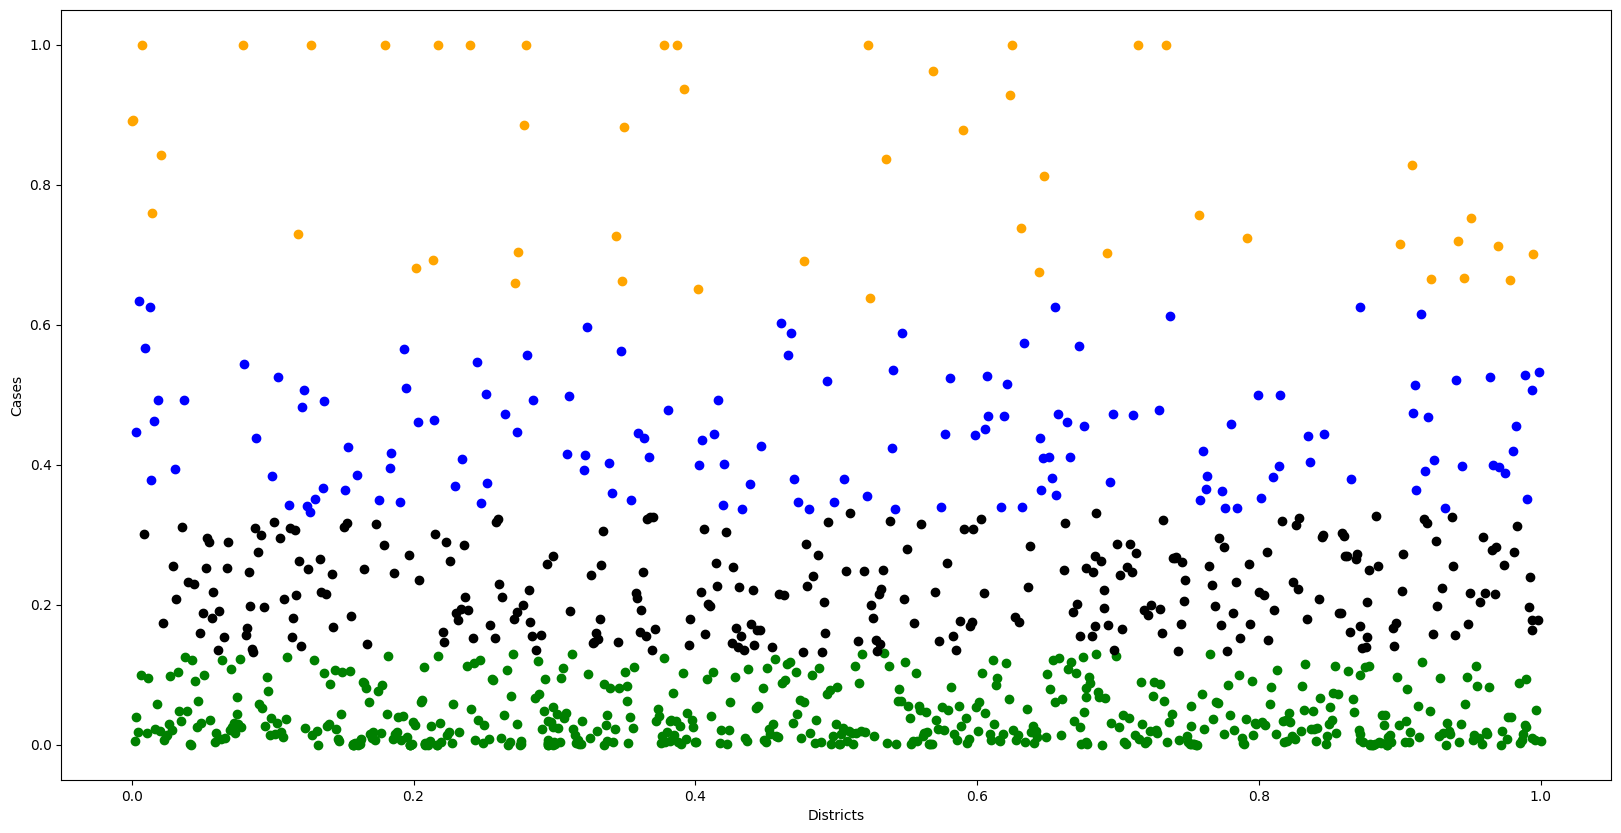

In [63]:
df1 = d[d.cluster==0]
df2 = d[d.cluster==1]
df3 = d[d.cluster==2]
df4 = d[d.cluster==3]
# df5 = d[d.cluster==4]

plt.figure(figsize=(20,10))
plt.scatter(df1['DISTRICT'],df1['CASES'],color='green')
plt.scatter(df2['DISTRICT'],df2['CASES'],color='blue')
plt.scatter(df3['DISTRICT'],df3['CASES'],color='black')
plt.scatter(df4['DISTRICT'],df4['CASES'],color='orange')
# plt.scatter(df5['DISTRICT'],df5['CASES'],color='red')

plt.xlabel('Districts')
plt.ylabel('Cases')

plt.show()

### Labeling target classes

In [64]:
print('Cluster  0 => ' + str(d['CASES'][d['cluster'] == 0].mean().__round__(2)))
print('Cluster  1 => ' + str(d['CASES'][d['cluster'] == 1].mean().__round__(2)))
print('Cluster  2 => ' + str(d['CASES'][d['cluster'] == 2].mean().__round__(2)))
print('Cluster  3 => ' + str(d['CASES'][d['cluster'] == 3].mean().__round__(2)))

Cluster  0 => 0.04
Cluster  1 => 0.44
Cluster  2 => 0.22
Cluster  3 => 0.82


In [65]:
d.sample(10)

,STATE,DISTRICT,CASES,cluster
1066,WEST BENGAL,0.611987,0.030207,0
40,ANDHRA PRADESH,0.976866,0.039184,0
37,ANDHRA PRADESH,0.973712,0.257454,2
798,RAJASTHAN,0.196635,0.271658,2
301,GUJARAT,0.725552,0.089890,0
403,JAMMU & KASHMIR,0.779180,0.042704,0
321,HARYANA,0.022082,0.173191,2
664,MEGHALAYA,0.319664,0.034251,0
736,ODISHA,0.885384,0.003572,0
565,MADHYA PRADESH,0.597266,0.307564,2


In [66]:
create_download_link(d)

### Clustered Data train_test_split

In [67]:
d['DISTRICT'] = scaler_dist.inverse_transform(d[['DISTRICT']])
d['CASES'] = scaler_cases.inverse_transform(d[['CASES']])
d['DISTRICT'] = d.DISTRICT.astype(int)
d['CASES'] = d.CASES.astype(int)
d['DISTRICT'] = le_dist.inverse_transform(d[['DISTRICT']])

In [68]:
d.sample(10)

,STATE,DISTRICT,CASES,cluster
820,RAJASTHAN,JODHPUR,33821,2
24,ANDHRA PRADESH,KURNOOL,89876,1
312,GUJARAT,VADODARA CITY,12651,0
1048,WEST BENGAL,BURDWAN,64972,1
478,KARNATAKA,MANGALURU CITY,3039,0
42,ANDHRA PRADESH,VISAKHAPATNAM,69674,1
445,KARNATAKA,BELAGAVI CITY,2395,0
890,TAMIL NADU,THIRUVALLUR,49357,2
1080,WEST BENGAL,SILIGURI_PC,8198,0
78,ASSAM,C.I.D.,442,0


In [69]:
d.head()

,STATE,DISTRICT,CASES,cluster
0,A&N ISLANDS,A AND N ISLANDS,807,0
1,A&N ISLANDS,ANDAMAN,7377,0
2,A&N ISLANDS,CAR,48,0
3,A&N ISLANDS,NICOBAR,266,0
4,A&N ISLANDS,NORTH,271,0


In [70]:
print(d[d.cluster == 0].CASES.mean().__round__(3))
print(d[d.cluster == 1].CASES.mean().__round__(3))
print(d[d.cluster == 2].CASES.mean().__round__(3))
print(d[d.cluster == 3].CASES.mean().__round__(3))

6091.263
67612.945
33837.402
125896.041


In [71]:
d[d.cluster == 0].head()

,STATE,DISTRICT,CASES,cluster
0,A&N ISLANDS,A AND N ISLANDS,807,0
1,A&N ISLANDS,ANDAMAN,7377,0
2,A&N ISLANDS,CAR,48,0
3,A&N ISLANDS,NICOBAR,266,0
4,A&N ISLANDS,NORTH,271,0


In [72]:
d[d.cluster == 1].head()

,STATE,DISTRICT,CASES,cluster
10,ANDHRA PRADESH,ADILABAD,68340,1
11,ANDHRA PRADESH,ANANTAPUR,75216,1
12,ANDHRA PRADESH,CHITTOOR,86454,1
13,ANDHRA PRADESH,CUDDAPAH,70998,1
22,ANDHRA PRADESH,KHAMMAM,79510,1


In [73]:
d[d.cluster == 2].head()

,STATE,DISTRICT,CASES,cluster
19,ANDHRA PRADESH,GUNTUR URBAN,22504,2
32,ANDHRA PRADESH,RANGA REDDY,43228,2
34,ANDHRA PRADESH,SRIKAKULAM,49861,2
37,ANDHRA PRADESH,VIJAYAWADA,39350,2
41,ANDHRA PRADESH,VISAKHA RURAL,42178,2


In [74]:
d[d.cluster == 3].head()

,STATE,DISTRICT,CASES,cluster
14,ANDHRA PRADESH,CYBERABAD,152842,3
15,ANDHRA PRADESH,EAST GODAVARI,107602,3
18,ANDHRA PRADESH,GUNTUR,111014,3
20,ANDHRA PRADESH,HYDERABAD CITY,152842,3
21,ANDHRA PRADESH,KARIMNAGAR,105564,3


In [75]:
d.cluster = d.cluster.replace(3, "Very high crime area")
d.cluster = d.cluster.replace(1, "High crime area")
d.cluster = d.cluster.replace(2, "Low crime area")
d.cluster = d.cluster.replace(0, "Very low crime area")

In [76]:
d.sample(10)

,STATE,DISTRICT,CASES,cluster
93,ASSAM,KAMRUP,32948,Low crime area
534,MADHYA PRADESH,BETUL,47385,Low crime area
436,JHARKHAND,SAHEBGANJ,14020,Very low crime area
1041,WEST BENGAL,ASANSOL-DURGAPUR PC,4738,Very low crime area
824,RAJASTHAN,JODHPUR WEST,8498,Very low crime area
403,JAMMU & KASHMIR,REASI,6527,Very low crime area
550,MADHYA PRADESH,GWALIOR,134857,Very high crime area
882,TAMIL NADU,SALEM URBAN,33443,Low crime area
1025,UTTARAKHAND,CHAMPAWAT,1396,Very low crime area
705,ODISHA,BHADRAK,27671,Low crime area


In [77]:
d[(d['cluster'] == 'Very low crime area') & (d['STATE'] == 'DELHI')]

,STATE,DISTRICT,CASES,cluster
209,DELHI,CAW,796,Very low crime area
211,DELHI,CRIME BRANCH,393,Very low crime area
214,DELHI,EOW,783,Very low crime area
215,DELHI,G.R.P.(RLY),6640,Very low crime area
216,DELHI,GRP(RLY),6442,Very low crime area
217,DELHI,I.G.I. AIRPORT,2700,Very low crime area
218,DELHI,IGI AIRPORT,5151,Very low crime area
221,DELHI,NORTH EAST,13427,Very low crime area
226,DELHI,S.T.F.,158,Very low crime area
231,DELHI,SPL CELL,133,Very low crime area


In [78]:
pd.DataFrame(d[d['STATE'] == 'TAMIL NADU']['cluster'].value_counts())

,cluster
Very low crime area,22
High crime area,17
Low crime area,13
Very high crime area,5
